In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [3]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.fcc.total.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_atac_fcc_total = dat
print(dim(dat))
head(dat)

[1] 732434      7


Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T
chr1,100021298,100021629,chr1:100021298-100021629,-1.03799571,ASTARR,ASTARR_T
chr1,100023727,100023976,chr1:100023727-100023976,-0.19100207,ASTARR,ASTARR_T
chr1,100027983,100029702,chr1:100027983-100029702,-0.18001582,ASTARR,ASTARR_T


In [4]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.atac.quantile.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_atac_quantile = dat
print(dim(dat))
head(dat)

[1] 246852      6


Chrom,Start,End,Peak,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ATAC,ATAC_Q3
chr1,14253,14645,chr1:14253-14645,ATAC,ATAC_Q3
chr1,16015,16477,chr1:16015-16477,ATAC,ATAC_Q3
chr1,17237,17772,chr1:17237-17772,ATAC,ATAC_Q4
chr1,28903,29613,chr1:28903-29613,ATAC,ATAC_Q3
chr1,30803,31072,chr1:30803-31072,ATAC,ATAC_Q3


In [6]:
dat = dat_peak_atac_quantile
table(dat$Assay_Label)


ATAC_Q1 ATAC_Q2 ATAC_Q3 ATAC_Q4 
  61713   61713   61713   61713 

In [10]:
dat = dat_peak_atac_quantile
lst = split(dat$Peak, dat$Assay_Label)

lst_vec_peak_atac_quantile = lst
names(lst)

[1] "ATAC_Q1" "ATAC_Q2" "ATAC_Q3" "ATAC_Q4"

In [11]:
dat = dat_peak_atac_fcc_total
table(dat$Assay_Label)


               ASTARR_T        CRISPRi-Growth_T         CRISPRi-HCRFF_T 
                 246850                   80288                    1330 
 ENCODE-E2G_Benchmark_T ENCODE-E2G_Prediction_T                 LMPRA_T 
                   3007                   84129                   68420 
                TMPRA_T                WSTARR_T 
                   1722                  246688 

In [14]:
dat = dat_peak_atac_fcc_total
lst = split(dat$Peak, dat$Assay_Label)

lst_vec_peak_atac_fcc_total = lst
names(lst)

[1] "ASTARR_T"                "CRISPRi-Growth_T"       
[3] "CRISPRi-HCRFF_T"         "ENCODE-E2G_Benchmark_T" 
[5] "ENCODE-E2G_Prediction_T" "LMPRA_T"                
[7] "TMPRA_T"                 "WSTARR_T"

In [16]:
lst = lst_vec_peak_atac_fcc_total
vec = names(lst)
names(vec) = vec
vec_txt_assay = vec

lst = lapply(vec_txt_assay, function(txt_assay){

    vec_peak_fcc_total = lst_vec_peak_atac_fcc_total[[txt_assay]]
    
    lst_inner = lst_vec_peak_atac_quantile
    lst_inner = lapply(lst_inner, function(vec_peak_atac_quantile){
        vec = vec_peak_fcc_total %in% vec_peak_atac_quantile
        num = mean(vec)
        return(num)
    
    })

    vec = unlist(lst_inner)
    return(vec)
})

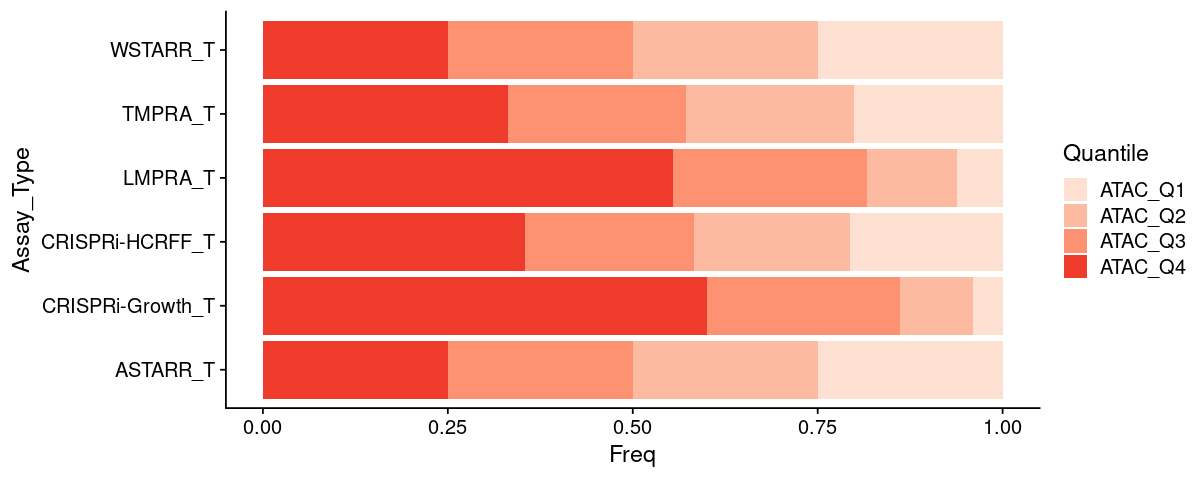

In [24]:
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth")
vec = c(paste(vec, "T", sep="_"))

dat = bind_rows(lst, .id = "Assay_Type")
dat = dat %>% dplyr::filter(Assay_Type %in% vec)
dat = dat %>% 
    tidyr::gather(Quantile, Freq, -Assay_Type)

vec_txt_color = c("ATAC_Q4" = "#ef3b2c", "ATAC_Q3" = "#fc9272", "ATAC_Q2" = "#fcbba1", "ATAC_Q1" = "#fee0d2")

options(repr.plot.height=4, repr.plot.width=10)
gpt = ggplot(dat, aes(x=Assay_Type, y=Freq, fill=Quantile)) +
    geom_col() +
    coord_flip() +
    theme_cowplot() +
    scale_fill_manual(values = vec_txt_color)
print(gpt)